# Session 1

## Warming up ![gVXR](img/gvxr_logo.png)

## Author: Franck Vidal

(version 1.0, 10 Feb 2023)

# Aims of this session

1. Install the Python packages needed for this course;
2. Check that [gVirtualXray](https://gvirtualxray.sourceforge.io/) is working well;
3. Verify which version of [gVirtualXray](https://gvirtualxray.sourceforge.io/) is installed (software and hardware); and
4. How to get help.

# 1. Install the Python packages needed for this course

The Virtual X-Ray Imaging Library on GPU (gVirtualXray, or in short gVXR) is available on [Pypi](https://pypi.org/project/gVXR/). You can easily install it using `pip` on Windows, Linux, and MacOS (Intel only).

---
## Task:

1. In the cell below, type and execute:

```bash
!pip install --user --upgrade gvxr
```

- The option `--user` is needed to make sure the package is installed in our home directory. If we omit it, we may get a "permission denied" error. 
- `--upgrade` is needed because the package may be already installed.


2. Execute the code of the cell. We must either click on the triangle next to the square at the top of the window, or use the keyboard shortcut `<SHIFT+ENTER>`.

In [2]:
!pip install --user --upgrade gvxr

# 2. Check that [gVirtualXray](https://gvirtualxray.sourceforge.io/) is working well

Two test programs are embedded in the Python package:

1. `test_offscreen.py` is for offscreen systems such as cloud instances or notes on supercomputers), and
2. `test.py` is for our laptops and desktop computers.

---
## Task:

In the cell below type and run:

```python
from gvxrPython3 import test_offscreen
```

Create an OpenGL context using EGL
Set up the beam
Set up the detector
Load the mesh data from /home/fpvidal/.local/lib/python3.10/site-packages/gvxrPython3/_gvxrPython3/welsh-dragon-small.stl
Move  Dragon  to the centre
Set  Dragon 's material
Compute an X-ray image
Save the last image into a file


Mon Feb 13 14:37:05 2023 ---- Create window (ID: 0)
Mon Feb 13 14:37:05 2023 ---- Query the number of EGL devices
Mon Feb 13 14:37:05 2023 ---- Success
Mon Feb 13 14:37:05 2023 ---- Detected 2 EGL devices.
Mon Feb 13 14:37:05 2023 ---- Print the details here of every EGL device.
Mon Feb 13 14:37:05 2023 ---- Success
Mon Feb 13 14:37:05 2023 ---- Device 1/2:
Mon Feb 13 14:37:05 2023 ---- 	Device Extensions: EGL_NV_device_cuda EGL_EXT_device_drm EGL_EXT_device_drm_render_node EGL_EXT_device_query_name EGL_EXT_device_persistent_id
Mon Feb 13 14:37:05 2023 ---- 	Device vendor: NVIDIA
Mon Feb 13 14:37:05 2023 ---- 	Failed to retrieve EGL DRM device file.
Mon Feb 13 14:37:05 2023 ---- Device 2/2:
Mon Feb 13 14:37:05 2023 ---- 	Device Extensions: EGL_MESA_device_software
Mon Feb 13 14:37:05 2023 ---- 	Failed to retrieve device vendor.
Mon Feb 13 14:37:05 2023 ---- 	Failed to retrieve EGL DRM device file.
Mon Feb 13 14:37:05 2023 ---- EGL client extensions: EGL_EXT_platform_base EGL_EXT_device

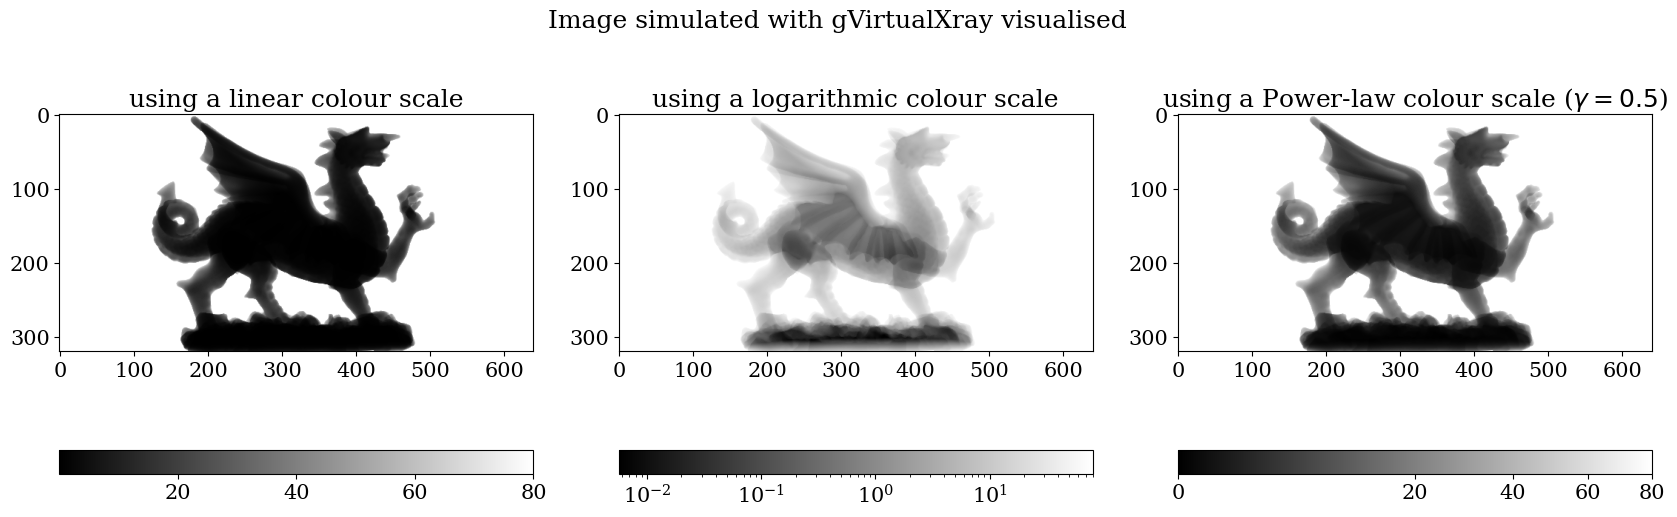

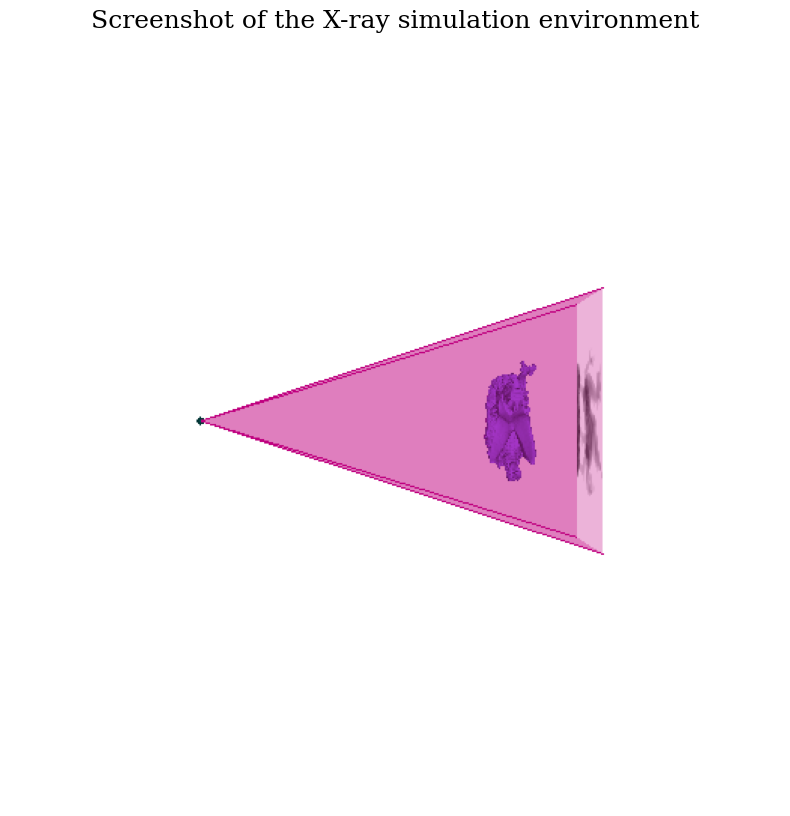

Mon Feb 13 14:37:08 2023 ---- Destroy all the windows
Mon Feb 13 14:37:08 2023 ---- Destroy window 0(0x559ab1cded90)


In [3]:
from gvxrPython3 import test_offscreen

In the terminal, we would type:

```bash
python -m gvxrPython3.test_offscreen
```

or

```bash
python3 -m gvxrPython3.test_offscreen
```

# 3. Check that gVirtualXray is installed (software and hardware)

The wrapper for Python 3 is called "gvxrPython3". 
Where does the "3" come from? 
This is because a few years ago there was "gvxrPython2" for Python 2, which is now deprecated. "gvxrPython2" is no longer maintained as a consequence. 
I personaly find that `gvxrPython3` is a bit too long to type. 

---
## Task:

In the cell below, type and execute: 

```python
from gvxrPython3 import gvxr
```

It defines `gvxr` as an alias for `gvxrPython3`.

In [4]:
from gvxrPython3 import gvxr


## [gVirtualXray](https://gvirtualxray.sourceforge.io/)'s source code is split into 3 components

- **Core**: the C++ low-level programming interface. This is where all the core functionalities to simulate X-ray images are implemented. 
- **SimpleGVXR**: the C++ high-level programming interface. It is a subset of the core library. It also includes additional functionalities to create OpenGL contextes. It contains all we need to simulate X-ray images.
- **Wrappers**: exposes SimpleGVXR to other programming languages, including Python 3, Java, C#, R, Tcl, GNU Octave, Perl and Ruby.

---
## Task:

Run the next two cells to check the different versions. Their numbers should match.

In [5]:
print(gvxr.getVersionOfCoreGVXR())

gVirtualXRay core library (gvxr) 2.0.3 (2023-01-13T14:22:56) [Compiler: GNU g++] on Linux


In [7]:
print(gvxr.getVersionOfSimpleGVXR())

SimpleGVXR 2.0.3 (2023-01-13T14:22:56) [Compiler: GNU g++] on Linux


## Hardware implementation

We first need to create an OpenGL context (else it'll crash). 

---
## Task:

1. Run the cell below, and
2. Check the output. How many EGL devices were found? 

In [8]:
# Create the OpenGL context  
backend = "EGL" # using EGL (for Linux only)
# backend = "OPENGL" # Window and Apple computers must use "OPENGL". This backend is also supported on Linux.
gvxr.createNewContext(backend) 

Mon Feb 13 14:42:18 2023 ---- Create window (ID: -1)
Mon Feb 13 14:42:18 2023 ---- EGL client extensions: EGL_EXT_platform_base EGL_EXT_device_base EGL_EXT_device_enumeration EGL_EXT_device_query EGL_KHR_client_get_all_proc_addresses EGL_EXT_client_extensions EGL_KHR_debug EGL_KHR_platform_x11 EGL_EXT_platform_x11 EGL_EXT_platform_device EGL_KHR_platform_wayland EGL_EXT_platform_wayland EGL_KHR_platform_gbm EGL_MESA_platform_gbm EGL_MESA_platform_xcb EGL_MESA_platform_surfaceless
Mon Feb 13 14:42:18 2023 ---- EGL, find the default display
Mon Feb 13 14:42:18 2023 ---- 	SUCCESS
Mon Feb 13 14:42:18 2023 ---- Initialise EGL
Mon Feb 13 14:42:18 2023 ---- EGL version: 1.5
Mon Feb 13 14:42:18 2023 ---- Bind the OpenGL API to EGL
Mon Feb 13 14:42:18 2023 ---- Create the context
Mon Feb 13 14:42:18 2023 ---- Create the surface
Mon Feb 13 14:42:18 2023 ---- Make the context current
Mon Feb 13 14:42:18 2023 ---- Initialise GLEW
Mon Feb 13 14:42:18 2023 ---- OpenGL version supported by this platf

---
## Task:

Run the following cell and check the output? On my PC, I see

1. The GPU manufacturer ("NVIDIA Corporation" in our case),
2. The hardware version (NVIDIA GeForce RTX 2080 Ti/PCIe/SSE2),
3. The software version (3.2.0 NVIDIA 515.76).

In [9]:
print("OpenGL vendor:", gvxr.getOpenGlVendor())
print("OpenGL renderer:", gvxr.getOpenGlRenderer())
print("OpenGL version:", gvxr.getOpenGlVersion())

OpenGL vendor: NVIDIA Corporation
OpenGL renderer: NVIDIA GeForce RTX 2080 Ti/PCIe/SSE2
OpenGL version: 4.5.0 NVIDIA 515.76


Run the following cell to release the OpenGL context as it is no longer needed (it's good practice to cleanup and release resources).

In [10]:
gvxr.terminate()

Mon Feb 13 14:42:48 2023 ---- Destroy all the windows
Mon Feb 13 14:42:48 2023 ---- Destroy window 0(0x559ab234d370)


# 4. How to get help

The best place to find help is to:

- Subscribe to the mailing list: [https://sourceforge.net/projects/gvirtualxray/lists/gvirtualxray-discuss](https://sourceforge.net/projects/gvirtualxray/lists/gvirtualxray-discuss); or
- Check the technical documentation:
    - [From the C++ header file](https://sourceforge.net/p/gvirtualxray/code/HEAD/tree/trunk/SimpleGVXR/SimpleGVXR.h). I always have this page loaded. Even if I wrote gVXR, I may forget the exact name of a function. 
    - Alternatively, call `help(gvxr)` in Python.

If you find a bug or request a new feature, you may:

- Email me (Franck P. Vidal, Bangor University);
- Open a ticket on [SourceForge](https://sourceforge.net/p/gvirtualxray/): [https://sourceforge.net/p/gvirtualxray/tickets](https://sourceforge.net/p/gvirtualxray/tickets);
- Use the forum on [SourceForge](https://sourceforge.net/p/gvirtualxray/): [https://sourceforge.net/p/gvirtualxray/discussion/](https://sourceforge.net/p/gvirtualxray/discussion/); or
- Send a message to the mailing list: [https://sourceforge.net/projects/gvirtualxray/lists/gvirtualxray-discuss](https://sourceforge.net/projects/gvirtualxray/lists/gvirtualxray-discuss).

In [12]:
help(gvxr)

Help on function getSourcePosition in module gvxrPython3._gvxrPython3.temp_gvxrPython3:

getSourcePosition(aUnitOfLength)
    Accessor on the position of the X-ray source.  
    
    Parameters
    ----------
    * `aUnitOfLength` :  
        the unit of length corresponding to the returned value. Acceptable values
        are: "um", "micrometre", "micrometer", "mm", "millimetre",
        "millimeter", "cm", "centimetre", "centimeter", "dm",
        "decimetre", "decimeter", "m", "metre", "meter", "dam",
        "decametre", "decameter", "hm", "hectometre", "hectometer",
        "km", "kilometre", "kilometer"  
    
    Returns
    -------
    the source position in a given unit of length

